In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filesname:
        print(os.path.join(dirname, filename))

In [6]:
#loading data
iris_df = pd.read_csv(r"C:\Users\vinit\OneDrive\Desktop\Iris.csv")

In [7]:
#displaying first 5 rows
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#basic information about dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# statistical summary of the dataset
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Renaming columns for simplicity
iris_df.columns = ['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
#droping Id 
iris_df = iris_df.drop(columns=['Id'])

In [11]:
iris_df.shape

(150, 5)

C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

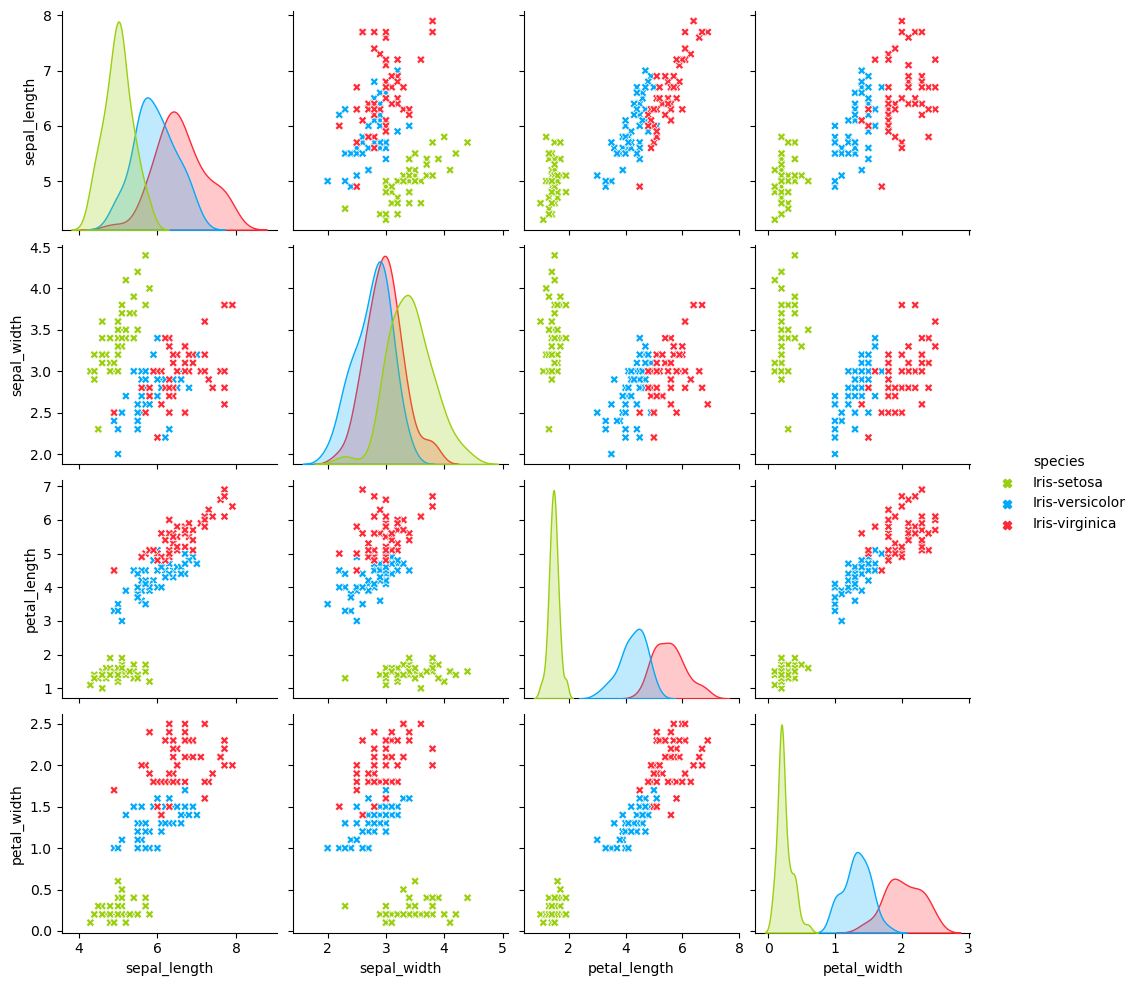

In [12]:
# Pairplot
# Define custom palette and markers
# Custom colors
custom_palette = {'Iris-setosa': '#9acf0f', 'Iris-versicolor': '#02a9fa', 'Iris-virginica': '#ff2a37'}
# Custom markers
custom_markers = {'Iris-setosa': 'X', 'Iris-versicolor': 'X', 'Iris-virginica': 'X'}  

# Pairplot with custom palette and markers
sns.pairplot(iris_df, hue='species', palette=custom_palette, markers=custom_markers)
plt.show()

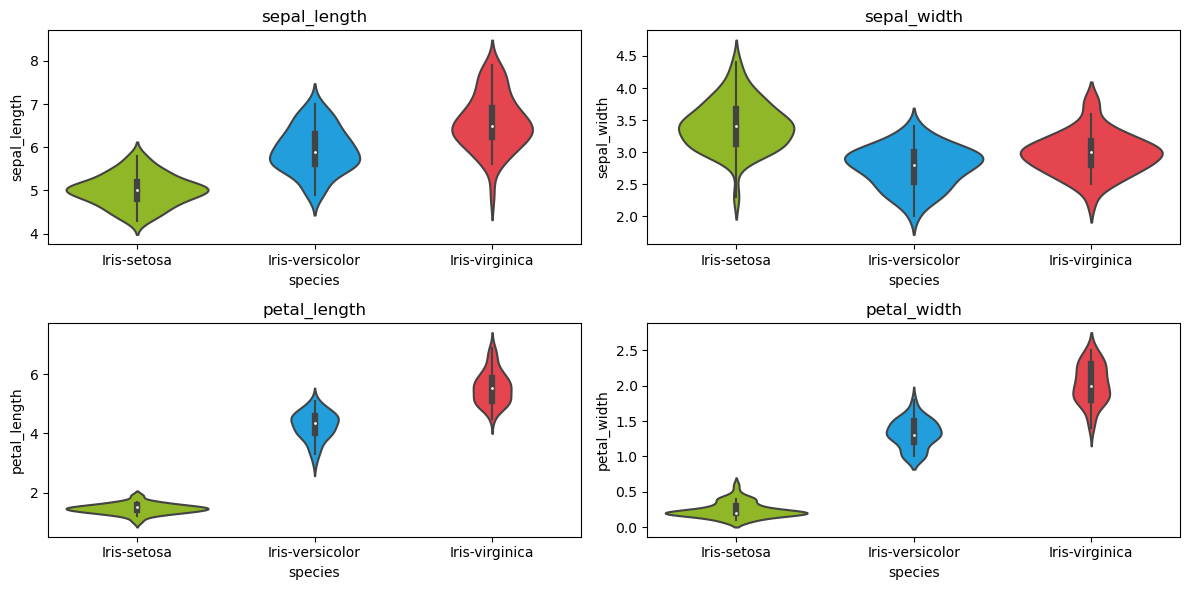

In [13]:
# Violin plot
plt.figure(figsize=(12, 6))
for i, column in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=column, data=iris_df, palette=custom_palette)
    plt.title(column)
plt.tight_layout()
plt.show()

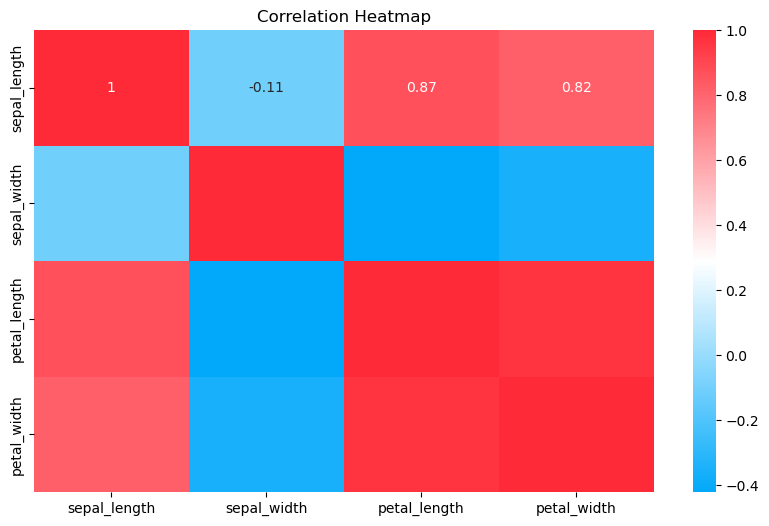

In [14]:
# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#02a9fa', '#ffffff', '#ff2a37'])

# Exclude non-numeric columns from the DataFrame
numeric_df = iris_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap)
plt.title('Correlation Heatmap')
plt.show()